In [1]:
%pylab inline
from gplearn.genetic import SymbolicRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.utils.random import check_random_state
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

Populating the interactive namespace from numpy and matplotlib


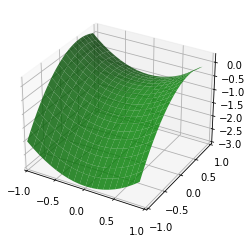

In [4]:
# Creating the data being used
x0 = np.arange(-1, 1, 0.1)
x1 = np.arange(-1, 1, 0.1)
x0, x1 = np.meshgrid(x0, x1)
y_truth = x0**2 - x1**2 + x1 - 1

ax = plt.figure().gca(projection='3d')
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
surf = ax.plot_surface(x0, x1, y_truth, rstride=1, cstride=1,
                      color='green', alpha=0.8)
plt.show()

In [5]:
rng = check_random_state(0)

# Training samples
X_train = rng.uniform(-1, 1, 100).reshape(50, 2)
y_train = X_train[:, 0]**2 - X_train[:, 1]**2 + X_train[:, 1] - 1

# Testing samples
X_test = rng.uniform(-1, 1, 100).reshape(50, 2)
y_test = X_test[:, 0]**2 - X_test[:, 1]**2 + X_test[:, 1] - 1

In [7]:
est_gp = SymbolicRegressor(population_size=5000,
                          generations=20,
                          stopping_criteria=0.01,
                          p_crossover=0.7,
                          p_subtree_mutation=0.1,
                          p_hoist_mutation=0.05,
                          p_point_mutation=0.1,
                          max_samples=0.9,
                          verbose=1,
                          parsimony_coefficient=0.01,
                          random_state=0)
est_gp.fit(X_train, y_train)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    38.13          458.578        5         0.320666         0.556764      2.24m
   1     9.97          1.70233        5         0.320202         0.624787      1.20m
   2     7.72          1.94456       11         0.239537         0.533148     46.45s
   3     5.41         0.990157        7         0.235676         0.719906     41.43s
   4     4.66         0.894443       11         0.103946         0.103946     38.41s
   5     5.41         0.940242       11         0.060802         0.060802     35.62s
   6     6.78          1.09536       11      0.000781474      0.000781474     33.21s


SymbolicRegressor(max_samples=0.9, p_crossover=0.7, p_hoist_mutation=0.05,
                  p_point_mutation=0.1, p_subtree_mutation=0.1,
                  parsimony_coefficient=0.01, population_size=5000,
                  random_state=0, stopping_criteria=0.01, verbose=1)

In [8]:
print(est_gp._program)

sub(add(-0.999, X1), mul(sub(X1, X0), add(X0, X1)))


In [10]:
est_tree = DecisionTreeRegressor()
est_tree.fit(X_train, y_train)
est_rf = RandomForestRegressor()
est_rf.fit(X_train, y_train)

RandomForestRegressor()

In [12]:
x0.ravel()[:5]

array([-1. , -0.9, -0.8, -0.7, -0.6])

In [13]:
x0[:5]

array([[-1.00000000e+00, -9.00000000e-01, -8.00000000e-01,
        -7.00000000e-01, -6.00000000e-01, -5.00000000e-01,
        -4.00000000e-01, -3.00000000e-01, -2.00000000e-01,
        -1.00000000e-01, -2.22044605e-16,  1.00000000e-01,
         2.00000000e-01,  3.00000000e-01,  4.00000000e-01,
         5.00000000e-01,  6.00000000e-01,  7.00000000e-01,
         8.00000000e-01,  9.00000000e-01],
       [-1.00000000e+00, -9.00000000e-01, -8.00000000e-01,
        -7.00000000e-01, -6.00000000e-01, -5.00000000e-01,
        -4.00000000e-01, -3.00000000e-01, -2.00000000e-01,
        -1.00000000e-01, -2.22044605e-16,  1.00000000e-01,
         2.00000000e-01,  3.00000000e-01,  4.00000000e-01,
         5.00000000e-01,  6.00000000e-01,  7.00000000e-01,
         8.00000000e-01,  9.00000000e-01],
       [-1.00000000e+00, -9.00000000e-01, -8.00000000e-01,
        -7.00000000e-01, -6.00000000e-01, -5.00000000e-01,
        -4.00000000e-01, -3.00000000e-01, -2.00000000e-01,
        -1.00000000e-01, -2.2

In [15]:
y_gp = est_gp.predict(np.c_[x0.ravel(), x1.ravel()]).reshape(x0.shape)
score_gp = est_gp.score(X_test, y_test)
y_tree = est_tree.predict(np.c_[x0.ravel(), x1.ravel()]).reshape(x0.shape)
score_tree = est_tree.score(X_test, y_test)
y_rf = est_rf.predict(np.c_[x0.ravel(), x1.ravel()]).reshape(x0.shape)
score_rf = est_rf.score(X_test, y_test)

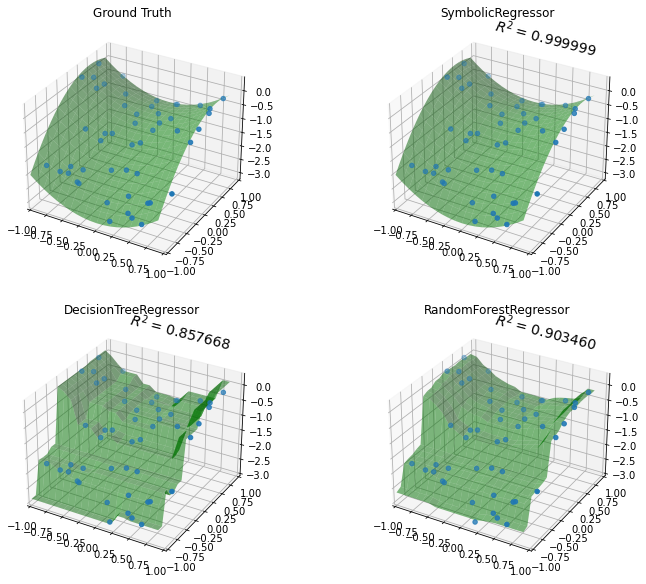

In [21]:
fig = plt.figure(figsize=(12, 10))

est_list = [(y_truth, None, "Ground Truth"),
           (y_gp, score_gp, "SymbolicRegressor"),
           (y_tree, score_tree, "DecisionTreeRegressor"),
           (y_rf, score_rf, "RandomForestRegressor")]
for i, (y, score, title) in enumerate(est_list):
    ax = fig.add_subplot(2, 2, i+1, projection='3d')
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    surf = ax.plot_surface(x0, x1, y, rstride=1, cstride=1, color='green', 
                           alpha=0.5)
    points = ax.scatter(X_train[:, 0], X_train[:, 1], y_train)
    if score:
        score = ax.text(-0.7, 1, 0.2, "$R^2 = \/ %.6f$" % score, 'x', 
                        fontsize=14)
    plt.title(title)
plt.show()

In [23]:
?text

In [26]:
dot_data = est_gp._program.export_graphviz()
graph = graphviz.Source(dot_data)
graph

NameError: name 'graphviz' is not defined